In [10]:
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from pypylon import pylon
from flyprojection.controllers.basler_camera import list_basler_cameras, BaslerCamera
import subprocess as sp
import os
import traceback

# list available cameras
print("Cameras Available:")
cameras = list_basler_cameras()

# Acquisition Parameters
EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 7000.0, 0.0, "Mono8", 2048, 2048, 248, 0

Cameras Available:
a2A2448-105g5m_40490701


In [11]:
# get a single image from the camera
with BaslerCamera(
    index=0,
    FPS=100,
    EXPOSURE_TIME=EXPOSURE_TIME,
    GAIN=GAIN,
    WIDTH=WIDTH,
    HEIGHT=HEIGHT,
    OFFSETX=OFFSETX,
    OFFSETY=OFFSETY,
    TRIGGER_MODE="Continuous",
    CAMERA_FORMAT=CAMERA_FORMAT,
    record_video=False,
    video_output_path=None,
    video_output_name=None,
    lossless=True,
    debug=False,
) as camera:
    camera.start()
    image = camera.get_array()
    camera.stop()

Trigger mode set to Continuous. FPS will be ignored.
Getting camera...
a2A2448-105g5m_40490701
Found 1 cameras.
Camera a2A2448-105g5m_40490701 selected.
Registered continuous acquisition configuration.
MaxNumBuffer set to 763200. Acquisitions will be limited to 2 hours. To change, modify the code.
Camera initialized.
Exposure time set to 7000.0 microseconds.
Gain set to 0.0 dB.
Set width to 2048, height to 2048, offset to (248, 0).
Camera initialized.


In [12]:
# # Acquisition Parameters
# EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 7000.0, 0.0, "Mono8", 2048, 2048, 248, 0

# # Create Background Subtractor using CPU (as CUDA version is not available)
# background_subtractor = cv2.createBackgroundSubtractorMOG2()

# # Create Blob Detector Parameters
# blob_params = cv2.SimpleBlobDetector_Params()
# blob_params.filterByArea = True
# blob_params.minArea = 100   # Minimum area of the blob
# blob_params.filterByCircularity = False
# blob_params.filterByConvexity = False
# blob_params.filterByInertia = False
# blob_detector = cv2.SimpleBlobDetector_create(blob_params)

# # create named windows
# cv2.namedWindow('Foreground Mask', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Blob Detection', cv2.WINDOW_NORMAL)

# # set window properties
# cv2.resizeWindow('Foreground Mask', 800, 800)
# cv2.resizeWindow('Blob Detection', 800, 800)

# latencies = []
# positions = []

# # Camera Capture
# with BaslerCamera(
#     index=0,
#     FPS=FPS,
#     EXPOSURE_TIME=EXPOSURE_TIME,
#     GAIN=GAIN,
#     WIDTH=WIDTH,
#     HEIGHT=HEIGHT,
#     OFFSETX=OFFSETX,
#     OFFSETY=OFFSETY,
#     TRIGGER_MODE="Continuous",
#     CAMERA_FORMAT=CAMERA_FORMAT,
#     record_video=False,
#     video_output_path=None,
#     video_output_name=None,
#     lossless=True,
#     debug=False,
# ) as camera:
#     camera.start()
    
#     current_time = time.perf_counter()

#     while True:
#         # Capture frame-by-frame
#         image = camera.get_array()
#         if image is None:
#             continue
        
#         # Background Subtraction
#         fg_mask = background_subtractor.apply(image, learningRate=0.0001)

#         # Blob Detection
#         keypoints = blob_detector.detect(fg_mask)

#         # Get the positions of the detected blobs
#         positions = [keypoint.pt for keypoint in keypoints]
        
#         # Draw detected blobs as red circles
#         output_frame = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        
#         # Display the resulting frame
#         cv2.imshow('Foreground Mask', fg_mask)
#         cv2.imshow('Blob Detection', output_frame)

#         # Calculate Latency
#         new_time = time.perf_counter()
#         latencies.append(new_time - current_time)
#         current_time = new_time
        
#         # Press 'q' to exit the loop
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    
#     # When everything is done, release the capture
#     camera.stop()
#     cv2.destroyAllWindows()

# # Plot Latency in seconds
# plt.plot(latencies)
# plt.xlabel('Frame Number')
# plt.ylabel('Latency (s)')
# plt.title('Latency of Blob Detection')
# plt.show()

In [ ]:
# import cv2
# import numpy as np
# from flyprojection.controllers.basler_camera import list_basler_cameras, BaslerCamera

# # Parameters
# FPS = 100
# # Acquisition Parameters
# EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 7000.0, 0.0, "Mono8", 2048, 2048, 248, 0

# # Initialize a background model to store the lightest frames
# background_model = None

# # create named windows
# cv2.namedWindow('Foreground Mask', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Blob Detection', cv2.WINDOW_NORMAL)

# # set window properties
# cv2.resizeWindow('Foreground Mask', 800, 800)
# cv2.resizeWindow('Blob Detection', 800, 800)

# # Camera Capture
# with BaslerCamera(
#     index=0,
#     FPS=FPS,
#     EXPOSURE_TIME=EXPOSURE_TIME,
#     GAIN=GAIN,
#     WIDTH=WIDTH,
#     HEIGHT=HEIGHT,
#     OFFSETX=OFFSETX,
#     OFFSETY=OFFSETY,
#     TRIGGER_MODE="Continuous",
#     CAMERA_FORMAT=CAMERA_FORMAT,
#     record_video=False,
#     video_output_path=None,
#     video_output_name=None,
#     lossless=True,
#     debug=False,
# ) as camera:
#     camera.start()
    
#     while True:
#         # Capture frame-by-frame
#         gray_frame = camera.get_array()
#         if gray_frame is None:
#             continue
        
#         # Initialize background model with the first frame
#         if background_model is None:
#             background_model = gray_frame.astype(np.float32)
#             continue
        
#         # Update background model by keeping the lightest pixels
#         cv2.accumulateWeighted(src=gray_frame, dst=background_model, alpha=0.001, mask=None)
#         background_model_uint8 = cv2.convertScaleAbs(background_model)
#         background_model_uint8 = np.maximum(background_model_uint8, gray_frame)

#         # Background Subtraction to get foreground mask
#         fg_mask = cv2.absdiff(background_model_uint8, gray_frame)
#         _, fg_mask = cv2.threshold(fg_mask, 50, 255, cv2.THRESH_BINARY)
        
#         # Apply a bit of morphological operations to reduce noise
#         kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#         fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
#         fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
        
#         # Display the resulting frame
#         cv2.imshow('Foreground Mask', fg_mask)
#         cv2.imshow('Blob Detection', gray_frame)
        
#         # Press 'q' to exit the loop
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    
#     # When everything is done, release the capture
#     camera.stop()
#     cv2.destroyAllWindows()

In [ ]:
# import cv2
# import numpy as np
# import time
# from flyprojection.controllers.basler_camera import BaslerCamera

# # Parameters
# FPS = 100
# # Acquisition Parameters
# EXPOSURE_TIME, GAIN, CAMERA_FORMAT, WIDTH, HEIGHT, OFFSETX, OFFSETY = 7000.0, 0.0, "Mono8", 2048, 2048, 248, 0

# # Initialize background models
# background_model_lightest = None

# # # create named windows
# cv2.namedWindow('Foreground Mask', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Blob Detection', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Lightest Background', cv2.WINDOW_NORMAL)

# # # set window properties
# cv2.resizeWindow('Foreground Mask', 800, 800)
# cv2.resizeWindow('Blob Detection', 800, 800)
# cv2.resizeWindow('Lightest Background', 800, 800)

# fpses = []basler_camera import BaslerCamera
#     EXPOSURE_TIME=EXPOSURE_TIME,
#     GAIN=GAIN,
#     WIDTH=WIDTH,
#     HEIGHT=HEIGHT,
#     OFFSETX=OFFSETX,
#     OFFSETY=OFFSETY,
#     TRIGGER_MODE="Continuous",
#     CAMERA_FORMAT=CAMERA_FORMAT,
#     record_video=False,
#     video_output_path=None,
#     video_output_name=None,
#     lossless=True,
#     debug=False,
# ) as camera:
#     camera.start()
    
#     # Start time to calculate FPS
#     start_time = time.time()
#     frame_count = 0
    
#     while True:
#         # Capture frame-by-frame
#         gray_frame = camera.get_array()
#         if gray_frame is None:
#             continue
        
#         # Initialize lightest background model with the first frame
#         if background_model_lightest is None:
#             background_model_lightest = gray_frame.astype(np.float32)
#             continue
        
#         # Update lightest background model by keeping the lightest pixels
#         background_model_lightest = np.maximum(background_model_lightest, gray_frame.astype(np.float32))
#         background_model_lightest_uint8 = cv2.convertScaleAbs(background_model_lightest)

#         # Background Subtraction to get foreground mask
#         fg_mask = cv2.absdiff(background_model_lightest_uint8, gray_frame)
#         _, fg_mask = cv2.threshold(fg_mask, 50, 255, cv2.THRESH_BINARY)
        
#         # Apply a bit of morphological operations to reduce noise
#         kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#         fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
#         fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
        
#         # Display the resulting frames
#         cv2.imshow('Foreground Mask', fg_mask)
#         cv2.imshow('Blob Detection', gray_frame)
#         cv2.imshow('Lightest Background', background_model_lightest_uint8)
        
#         # Calculate and display FPS
#         frame_count += 1
#         elapsed_time = time.time() - start_time
#         if elapsed_time > 0:
#             fps = frame_count / elapsed_time
#             fpses.append(fps)
#             # print(f"FPS: {fps:.2f}")
        
#         # Press 'q' to exit the loop
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    
#     # When everything is done, release the capture
#     camera.stop()
#     cv2.destroyAllWindows()

Trigger mode set to Continuous. FPS will be ignored.
Getting camera...
a2A2448-105g5m_40490701
Found 1 cameras.
Camera a2A2448-105g5m_40490701 selected.
Registered continuous acquisition configuration.
MaxNumBuffer set to 763200. Acquisitions will be limited to 2 hours. To change, modify the code.
Camera initialized.
Exposure time set to 9000.0 microseconds.
Gain set to 0.0 dB.
Set width to 2048, height to 2048, offset to (248, 0).
Camera initialized.
Splitting Targets


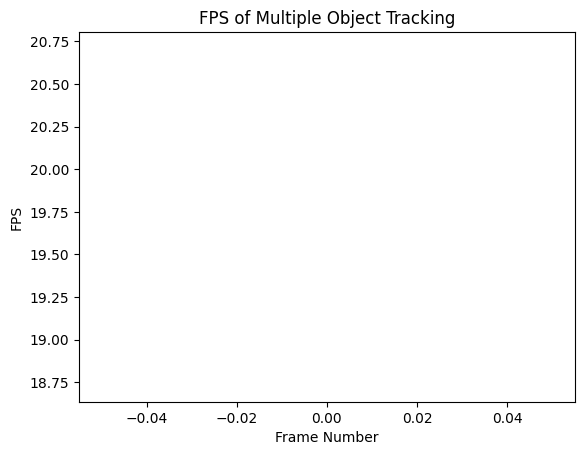

In [ ]:
import cv2
import numpy as np
import time
from scipy.spatial import distance
from scipy.optimize import linear_sum_assignment
from flyprojection.controllers.basler_camera import list_basler_cameras, BaslerCamera
import matplotlib.pyplot as plt

# Parameters
FPS = 100
MAX_TARGETS = 4 # User can specify the number of animals to track
EXPOSURE_TIME = 9000.0
GAIN = 0.0
CAMERA_FORMAT = "Mono8"
WIDTH = 2048
HEIGHT = 2048
OFFSETX = 248
OFFSETY = 0
KALMAN_NOISE_COVARIANCE = 0.03  # Process noise covariance for Kalman Filter
KALMAN_MEASUREMENT_NOISE_COVARIANCE = 0.1  # Measurement noise covariance for Kalman Filter
MORPH_KERNEL_SIZE = 5  # Size of the kernel for morphological operations
THRESHOLD_VALUE = 50  # Threshold value for foreground mask extraction
TRAJECTORY_THICKNESS = 2  # Thickness of the trajectory lines
TRAJECTORY_HISTORY_SECONDS = 5  # Keep last 5 seconds of trajectory
TRAJECTORY_COLORS = [tuple(color) for color in np.random.randint(0, 255, (MAX_TARGETS, 3)).tolist()]  # Random colors for trajectories
MIN_CONTOUR_AREA = 50  # Minimum area of the contour to be considered as a target
MAX_DISTANCE_THRESHOLD = 25 # Maximum distance threshold to assign a measurement to a Kalman filter
MIN_DETECTION_COUNTS = 10  # Minimum number of detection counts to start tracking
MIN_TRACKING_COUNTS = 10  # Minimum number of tracking counts to stabilize tracking



# Initialize background model
background_model_lightest = None

detection_initialized = False  # Flag to start tracking after all targets are detected
tracking_stabilized = False  # Flag to indicate that tracking is stabilized

# Kalman Filters for tracking multiple targets
trajectories = [[] for _ in range(MAX_TARGETS)]  # Trajectories of all targets
track_ids = np.arange(MAX_TARGETS)  # IDs of all targets
kalman_filters = [cv2.KalmanFilter(5, 3) for _ in range(MAX_TARGETS)]  # 5 state variables, 3 measurements
for i, kf in enumerate(kalman_filters):
    # Measurement matrix: Maps state to measurements (x, y, theta)
    kf.measurementMatrix = np.array([[1, 0, 0, 0, 0],  # x
                                      [0, 1, 0, 0, 0],  # y
                                      [0, 0, 1, 0, 0]], # theta
                                     np.float32)
    
    # Transition matrix: Defines how the state evolves
    kf.transitionMatrix = np.array([[1, 0, 0, 1, 0],  # x -> x + vx
                                     [0, 1, 0, 0, 1],  # y -> y + vy
                                     [0, 0, 1, 0, 0],  # theta -> theta
                                     [0, 0, 0, 1, 0],  # vx -> vx
                                     [0, 0, 0, 0, 1]], # vy -> vy
                                    np.float32)
    
    # Process noise covariance: Uncertainty in the model's predictions
    kf.processNoiseCov = np.eye(5, dtype=np.float32) * KALMAN_NOISE_COVARIANCE

    # Measurement noise covariance: Uncertainty in the measurements
    kf.measurementNoiseCov = np.eye(3, dtype=np.float32) * KALMAN_MEASUREMENT_NOISE_COVARIANCE

    # Initial state vector: Random initial positions and velocities
    kf.statePre = np.array([np.random.randint(0, WIDTH), np.random.randint(0, HEIGHT), 
                            0, 0, 0], np.float32)  # x, y, theta, vx, vy
    kf.statePost = kf.statePre.copy()

    # Error covariance matrix: Initial uncertainty in the state
    kf.errorCovPre = np.eye(5, dtype=np.float32)



# create named windows
cv2.namedWindow('Foreground Mask', cv2.WINDOW_NORMAL)
cv2.namedWindow('Blob Detection', cv2.WINDOW_NORMAL)
cv2.namedWindow('Lightest Background', cv2.WINDOW_NORMAL)

# set window properties
cv2.resizeWindow('Foreground Mask', 800, 800)
cv2.resizeWindow('Blob Detection', 800, 800)
cv2.resizeWindow('Lightest Background', 800, 800)

fpses = []


detection_counts = 0
tracking_counts = 0
conservative_used = False

# Camera Capture
with BaslerCamera(
    index=0,
    FPS=FPS,
    EXPOSURE_TIME=EXPOSURE_TIME,
    GAIN=GAIN,
    WIDTH=WIDTH,
    HEIGHT=HEIGHT,
    OFFSETX=OFFSETX,
    OFFSETY=OFFSETY,
    TRIGGER_MODE="Continuous",
    CAMERA_FORMAT=CAMERA_FORMAT,
    record_video=False,
    video_output_path=None,
    video_output_name=None,
    lossless=True,
    debug=False,
) as camera:
    camera.start()
    
    # Start time to calculate FPS
    start_time = time.time()
    frame_count = 0
    
    while True:
        # Capture frame-by-frame
        gray_frame = camera.get_array()
        if gray_frame is None:
            continue
        current_time = time.time()
        
        # Convert gray_frame to RGB
        color_frame = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR)
        
        # Initialize lightest background model with the first frame
        if background_model_lightest is None:
            background_model_lightest = gray_frame.astype(np.float32)
            continue
        
        # Update lightest background model by keeping the lightest pixels
        background_model_lightest = np.maximum(background_model_lightest, gray_frame.astype(np.float32))
        background_model_lightest_uint8 = cv2.convertScaleAbs(background_model_lightest)

        # Background Subtraction to get foreground mask
        fg_mask = cv2.absdiff(background_model_lightest_uint8, gray_frame)
        _, fg_mask = cv2.threshold(fg_mask, THRESHOLD_VALUE, 255, cv2.THRESH_BINARY)
        
        # Apply a bit of morphological operations to reduce noise
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (MORPH_KERNEL_SIZE, MORPH_KERNEL_SIZE))
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

        # create a conservative version of the foreground mask to split the targets if needed by eroding the mask
        split_mask = cv2.erode(fg_mask, kernel, iterations=2)
        
        # Find contours of the foreground objects
        contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        conservative_contours, _ = cv2.findContours(split_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Fit ellipses to detected contours and track them keeping only the largest contours
        measurements = []
        sizes = []

        if len(contours) > 0:
            for cnt in contours:
                # Filter by contour area
                size = cv2.contourArea(cnt)
                if size < MIN_CONTOUR_AREA:
                    continue
                
                if len(cnt) >= 5:  # Minimum points to fit an ellipse
                    ellipse = cv2.fitEllipse(cnt)
                    (x, y), (MA, ma), angle = ellipse
                    angle_radians = np.deg2rad(angle)  # Convert angle to radians
                    measurements.append(np.array([np.float32(x), np.float32(y), np.float32(angle_radians)]))
                    sizes.append(size)
                    
            # Keep only the largest contours
            if len(measurements) > MAX_TARGETS:
                sorted_indices = np.argsort(sizes)[::-1]
                measurements = [measurements[i] for i in sorted_indices[:MAX_TARGETS]]
            
        # if the number of contours is less than the number of targets, then we need to split the targets
        if len(measurements) < MAX_TARGETS:
            print("Splitting Targets")
            conservative_used = True
            measurements = []
            sizes = []
            # use the conservative mask instead
            for cnt in conservative_contours:
                # Filter by contour area
                size = cv2.contourArea(cnt)
                if size < MIN_CONTOUR_AREA:
                    continue
                
                if len(cnt) >= 5:
                    ellipse = cv2.fitEllipse(cnt)
                    (x, y), (MA, ma), angle = ellipse
                    angle_radians = np.deg2rad(angle)
                    measurements.append(np.array([np.float32(x), np.float32(y), np.float32(angle_radians)]))
                    sizes.append(size)

                # Keep only the largest contours
                if len(measurements) > MAX_TARGETS:
                    sorted_indices = np.argsort(sizes)[::-1]
                    measurements = [measurements[i] for i in sorted_indices[:MAX_TARGETS]]
        else:
            conservative_used = False


        # Start tracking only if all targets are detected
        if len(measurements) == MAX_TARGETS:
            detection_counts += 1
        else:
            detection_counts = 0

        if detection_counts >= MIN_DETECTION_COUNTS:
            detection_initialized = True

        
        if detection_initialized and measurements:
            predicted_positions = np.zeros((MAX_TARGETS, 3))  # Predicted positions of all Kalman filters
            # Predict next positions of all Kalman filters
            for i, kf in enumerate(kalman_filters):
                predicted = kf.predict()  # Now a 5-element vector: [x, y, theta, vx, vy]
                predicted_positions[i] = predicted[:3].flatten()  # Extract x, y, and theta

                        

            # Create cost matrix for Hungarian algorithm
            cost_matrix = np.zeros((MAX_TARGETS, len(measurements)))
            for i, predicted_pos in enumerate(predicted_positions):
                for j, measurement in enumerate(measurements):
                    position_cost = distance.euclidean(predicted_pos[:2], measurement[:2])  # x, y
                    angle_cost = np.abs(predicted_pos[2] - measurement[2])  # θ
                    angle_cost = min(angle_cost, 2 * np.pi - angle_cost)  # Ensure shortest angular distance
                    cost_matrix[i, j] = position_cost + angle_cost  # Combine position and angle costs

            
            # Solve assignment problem using Hungarian algorithm
            row_indices, col_indices = linear_sum_assignment(cost_matrix)
            
            # Assign measurements to Kalman filters
            avg_cost = 0
            for row, col in zip(row_indices, col_indices):
                if row < MAX_TARGETS and col < len(measurements):
                    # Check if the predicted position is close to the measurement
                    if not tracking_stabilized or cost_matrix[row, col] < MAX_DISTANCE_THRESHOLD:
                        # Correct the Kalman filter with the measurement
                        measurement_vector = np.array([[measurements[col][0]],  # x
                                                        [measurements[col][1]],  # y
                                                        [measurements[col][2]]], # theta
                                                    np.float32)
                        kalman_filters[row].correct(measurement_vector)
                        # Update the trajectory for the assigned Kalman filter
                        trajectories[row].append((int(measurements[col][0]), int(measurements[col][1]), int(measurements[col][2]), current_time))
                        # Keep only the last TRAJECTORY_HISTORY_SECONDS seconds of trajectory
                        trajectories[row] = [(x, y, th, t) for x, y, th, t in trajectories[row] if current_time - t <= TRAJECTORY_HISTORY_SECONDS]
                        avg_cost += cost_matrix[row, col]/MAX_TARGETS
                    else:
                        tracking_stabilized = False
                        tracking_counts = 0
                        # Update the trajectory for the assigned Kalman filter with NaN values
                        trajectories[row].append((np.nan, np.nan, np.nan, current_time))
                        # Keep only the last TRAJECTORY_HISTORY_SECONDS seconds of trajectory
                        trajectories[row] = [(x, y, th, t) for x, y, th, t in trajectories[row] if current_time - t <= TRAJECTORY_HISTORY_SECONDS]
                        

            # Check if the tracking is stabilized
            if avg_cost < MAX_DISTANCE_THRESHOLD:
                tracking_counts += 1
            else:
                tracking_counts = 0

            if tracking_counts >= MIN_TRACKING_COUNTS and not tracking_stabilized:
                tracking_stabilized = True
                print(f"Tracking Stabilized with Average Cost: {avg_cost}")
        
        # Draw tracked objects, IDs, and trajectories if tracking has started
        if detection_initialized:
            for i, _ in enumerate(kalman_filters):
                x, y, theta = trajectories[i][-1][:3]
                
                # Draw the ellipse over the trails
                cv2.circle(color_frame, (x, y), 10, TRAJECTORY_COLORS[i % len(TRAJECTORY_COLORS)], -1)
                # Draw orientation line
                length = 20  # Length of orientation line
                x_end = int(x + length * np.cos(theta))
                y_end = int(y + length * np.sin(theta))
                cv2.line(color_frame, (int(x), int(y)), (x_end, y_end), TRAJECTORY_COLORS[i % len(TRAJECTORY_COLORS)], 2)
                # Display the ID of the tracked object
                cv2.putText(color_frame, f"ID: {track_ids[i]}", (x + 15, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, TRAJECTORY_COLORS[i % len(TRAJECTORY_COLORS)], 2)
                # Draw the trajectory of each target
                for point_idx in range(1, len(trajectories[i])):
                    pt1 = (trajectories[i][point_idx - 1][0], trajectories[i][point_idx - 1][1])
                    pt2 = (trajectories[i][point_idx][0], trajectories[i][point_idx][1])
                    if not np.isnan(pt1[0]) and not np.isnan(pt1[1]) and not np.isnan(pt2[0]) and not np.isnan(pt2[1]):
                        cv2.line(color_frame, pt1, pt2, TRAJECTORY_COLORS[i % len(TRAJECTORY_COLORS)], TRAJECTORY_THICKNESS)
        
        # Display the resulting frames
        cv2.imshow('Foreground Mask', fg_mask if not conservative_used else split_mask)
        cv2.imshow('Blob Detection', color_frame)
        cv2.imshow('Lightest Background', cv2.cvtColor(background_model_lightest_uint8, cv2.COLOR_GRAY2BGR))
        
        # Calculate and display FPS
        frame_count += 1
        elapsed_time = time.time() - start_time
        if elapsed_time > 0:
            fps = frame_count / elapsed_time
            fpses.append(fps)
        
        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # When everything is done, release the capture
    camera.stop()
    cv2.destroyAllWindows()

# Plot FPS
fig, ax = plt.subplots()
ax.plot(fpses)
ax.set_xlabel('Frame Number')
ax.set_ylabel('FPS')
ax.set_title('FPS of Multiple Object Tracking')
plt.show()


In [ ]:
# Assuming BaslerCamera is properly imported and configured
from flyprojection.controllers.basler_camera import list_basler_cameras, BaslerCamera
from flyprojection.behavior.tracker import Tracker, FastTracker
import numpy as np
import time

# Initialize the camera
camera = BaslerCamera(
    index=0,
    FPS=100,
    EXPOSURE_TIME=9000.0,
    GAIN=0.0,
    WIDTH=2048,
    HEIGHT=2048,
    OFFSETX=248,
    OFFSETY=0,
    TRIGGER_MODE="Continuous",
    CAMERA_FORMAT="Mono8",
    record_video=False,
    video_output_path=None,
    video_output_name=None,
    lossless=True,
    debug=False,
)

# Initialize the tracker with the camera and desired parameters
tracker = FastTracker(
    camera=camera,
    n_targets=3,
    debug=True  # Set to True to see the tracking visualization
)

# Start the camera
camera.start()

times = []
try:
    while True:
        estimates = tracker.process_next_frame()
        # if estimates is not None:
        #     for estimate in estimates:
        #         print(f"ID: {estimate['id']}, Position: {estimate['position']}, "
        #               f"Velocity: {estimate['velocity']}, Angle: {np.rad2deg(estimate['angle'])}°, "
        #               f"Time Since Start: {estimate['time_since_start']:.2f}s")
        times.append(time.time())
except KeyboardInterrupt:
    pass
finally:
    # Release resources
    tracker.release_resources()
    camera.stop()



Trigger mode set to Continuous. FPS will be ignored.
Getting camera...
a2A2448-105g5m_40490701
Found 1 cameras.
Camera a2A2448-105g5m_40490701 selected.
Tracking Stabilized with Average Cost: 2.153643488883972
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Tracking Stabilized with Average Cost: 2.7696761588255567
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets
Splitting Targets


TypeError: stop() takes 1 positional argument but 3 were given

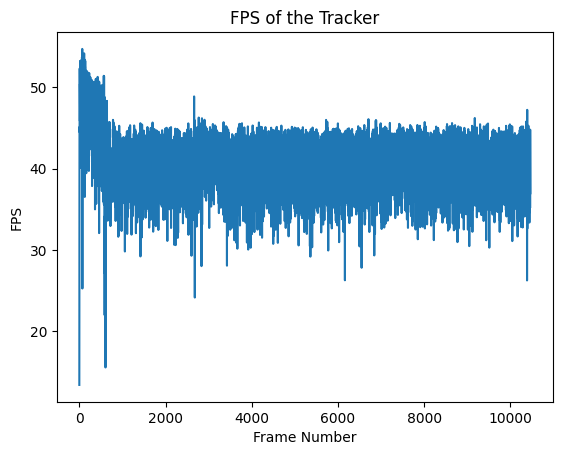

In [9]:
# Plot the time taken to process each frame
import matplotlib.pyplot as plt
plt.plot(1/np.diff(times))
plt.xlabel('Frame Number')
plt.ylabel('FPS')
plt.title('FPS of the Tracker')
plt.show()

In [16]:
# import cv2
# import numpy as np
# import time
# from scipy.spatial import distance
# from scipy.optimize import linear_sum_assignment
# from flyprojection.controllers.basler_camera import list_basler_cameras, BaslerCamera
# import matplotlib.pyplot as plt

# # Parameters
# FPS = 100
# MAX_TARGETS = 4 # User can specify the number of animals to track
# EXPOSURE_TIME = 9000.0
# GAIN = 0.0
# CAMERA_FORMAT = "Mono8"
# WIDTH = 2048
# HEIGHT = 2048
# OFFSETX = 248
# OFFSETY = 0

# MORPH_KERNEL_SIZE = 5  # Size of the kernel for morphological operations

# THRESHOLD_VALUE = 50  # Threshold value for foreground mask extraction

# TRAJECTORY_THICKNESS = 2  # Thickness of the trajectory lines
# TRAJECTORY_HISTORY_SECONDS = 5  # Keep last 5 seconds of trajectory
# TRAJECTORY_COLORS = [tuple(color) for color in np.random.randint(0, 255, (MAX_TARGETS, 3)).tolist()]  # Random colors for trajectories

# MIN_CONTOUR_AREA = 50  # Minimum area of the contour to be considered as a target
# MAX_DISTANCE_THRESHOLD = 25 # Maximum distance threshold to assign a measurement to a Kalman filter
# MIN_DETECTION_COUNTS = 10  # Minimum number of detection counts to start tracking
# MIN_TRACKING_COUNTS = 10  # Minimum number of tracking counts to stabilize tracking


# # Initialize background model
# background_model_lightest = None

# detection_initialized = False  # Flag to start tracking after all targets are detected
# tracking_stabilized = False  # Flag to indicate that tracking is stabilized


# # create named windows
# cv2.namedWindow('Foreground Mask', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Blob Detection', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Lightest Background', cv2.WINDOW_NORMAL)

# # set window properties
# cv2.resizeWindow('Foreground Mask', 800, 800)
# cv2.resizeWindow('Blob Detection', 800, 800)
# cv2.resizeWindow('Lightest Background', 800, 800)

# fpses = []

# detection_counts = 0
# tracking_counts = 0
# conservative_used = False
# last_positions = np.zeros((MAX_TARGETS, 2), np.float32)
# trajectories = [[] for _ in range(MAX_TARGETS)]  # Store trajectories of each target

# # Camera Capture
# with BaslerCamera(
#     index=0,
#     FPS=FPS,
#     EXPOSURE_TIME=EXPOSURE_TIME,
#     GAIN=GAIN,
#     WIDTH=WIDTH,
#     HEIGHT=HEIGHT,
#     OFFSETX=OFFSETX,
#     OFFSETY=OFFSETY,
#     TRIGGER_MODE="Continuous",
#     CAMERA_FORMAT=CAMERA_FORMAT,
#     record_video=False,
#     video_output_path=None,
#     video_output_name=None,
#     lossless=True,
#     debug=False,
# ) as camera:
#     camera.start()
    
#     # Start time to calculate FPS
#     start_time = time.time()
#     frame_count = 0
    
#     while True:
#         # Capture frame-by-frame
#         gray_frame = camera.get_array()
#         if gray_frame is None:
#             continue
#         current_time = time.time()
        
#         # Convert gray_frame to RGB
#         color_frame = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR)
        
#         # Initialize lightest background model with the first frame
#         if background_model_lightest is None:
#             background_model_lightest = gray_frame.astype(np.float32)
#             continue
        
#         # Update lightest background model by keeping the lightest pixels
#         background_model_lightest = np.maximum(background_model_lightest, gray_frame.astype(np.float32))
#         background_model_lightest_uint8 = cv2.convertScaleAbs(background_model_lightest)

#         # Background Subtraction to get foreground mask
#         fg_mask = cv2.absdiff(background_model_lightest_uint8, gray_frame)
#         _, fg_mask = cv2.threshold(fg_mask, THRESHOLD_VALUE, 255, cv2.THRESH_BINARY)
        
#         # Apply a bit of morphological operations to reduce noise
#         kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (MORPH_KERNEL_SIZE, MORPH_KERNEL_SIZE))
#         fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
#         fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

#         # create a conservative version of the foreground mask to split the targets if needed by eroding the mask
#         split_mask = cv2.erode(fg_mask, kernel, iterations=2)
        
#         # Find contours of the foreground objects
#         contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         conservative_contours, _ = cv2.findContours(split_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
#         # Fit ellipses to detected contours and track them keeping only the largest contours
#         measurements = []
#         sizes = []

#         if len(contours) > 0:
#             for cnt in contours:
#                 # Filter by contour area
#                 size = cv2.contourArea(cnt)
#                 if size < MIN_CONTOUR_AREA:
#                     continue
                
#                 if len(cnt) >= 5:  # Minimum points to fit an ellipse
#                     ellipse = cv2.fitEllipse(cnt)
#                     (x, y), (MA, ma), angle = ellipse
#                     measurements.append(np.array([np.float32(x), np.float32(y)]))
#                     sizes.append(size)
                    
#             # Keep only the largest contours
#             if len(measurements) > MAX_TARGETS:
#                 sorted_indices = np.argsort(sizes)[::-1]
#                 measurements = [measurements[i] for i in sorted_indices[:MAX_TARGETS]]
            
#         # if the number of contours is less than the number of targets, then we need to split the targets
#         if len(measurements) < MAX_TARGETS:
#             print("Splitting Targets")
#             conservative_used = True
#             measurements = []
#             sizes = []
#             # use the conservative mask instead
#             for cnt in conservative_contours:
#                 # Filter by contour area
#                 size = cv2.contourArea(cnt)
#                 if size < MIN_CONTOUR_AREA:
#                     continue
                
#                 if len(cnt) >= 5:
#                     ellipse = cv2.fitEllipse(cnt)
#                     (x, y), (MA, ma), angle = ellipse
#                     measurements.append(np.array([np.float32(x), np.float32(y)]))
#                     sizes.append(size)

#                 # Sort the contours by size
#                 sorted_indices = np.argsort(sizes)[::-1]
#                 measurements = [measurements[i] for i in sorted_indices]
#         else:
#             conservative_used = False


#         # Start tracking only if all targets are detected
#         if len(measurements) == MAX_TARGETS:
#             detection_counts += 1
#         else:
#             detection_counts = 0

#         if detection_counts >= MIN_DETECTION_COUNTS:
#             detection_initialized = True
#             # assign the measurements to the last positions
#             last_positions[:, :] = np.array(measurements)

        
#         if detection_initialized and measurements:
#             # Next predicted positions is the last positions
#             predicted_positions = last_positions.copy()

#             # Create cost matrix for Hungarian algorithm
#             cost_matrix = np.zeros((MAX_TARGETS, len(measurements)))
#             for i, predicted_pos in enumerate(predicted_positions):
#                 for j, measurement in enumerate(measurements):
#                     cost_matrix[i, j] = distance.euclidean(np.array(predicted_pos).flatten(), measurement.flatten())
            
#             # Solve assignment problem using Hungarian algorithm
#             row_indices, col_indices = linear_sum_assignment(cost_matrix)
            
#             # Assign measurements to tracks
#             avg_cost = 0
#             rows_to_reset = []
#             used_measurements = []
#             for row, col in zip(row_indices, col_indices):
#                 if row < MAX_TARGETS and col < len(measurements):
#                     # Check if the predicted position is close to the measurement
#                     if not tracking_stabilized or cost_matrix[row, col] < MAX_DISTANCE_THRESHOLD:
#                         # Update the trajectory for the assigned track
#                         trajectories[row].append((int(measurements[col][0]), int(measurements[col][1]), current_time))
#                         # Keep only the last TRAJECTORY_HISTORY_SECONDS seconds of trajectory
#                         trajectories[row] = [(x, y, t) for x, y, t in trajectories[row] if current_time - t <= TRAJECTORY_HISTORY_SECONDS]
#                         # reset the last positions
#                         last_positions[row] = measurements[col]
#                         avg_cost += cost_matrix[row, col]/MAX_TARGETS
#                         used_measurements.append(col)
#                     # else reset the kalman filter to the unassigned measurement
#                     else:
#                         rows_to_reset.append(row)

#             # Find the unused measurements
#             unused_measurements = set(range(len(measurements))) - set(used_measurements)
#             for row in rows_to_reset:
#                 if unused_measurements:
#                     col = unused_measurements.pop()
#                     last_positions[row] = measurements[col]
#                     # Update the trajectory for the assigned Kalman filter
#                     trajectories[row].append((int(measurements[col][0]), int(measurements[col][1]), current_time))
#                     # Keep only the last TRAJECTORY_HISTORY_SECONDS seconds of trajectory
#                     trajectories[row] = [(x, y, t) for x, y, t in trajectories[row] if current_time - t <= TRAJECTORY_HISTORY_SECONDS]


#             # Check if the tracking is stabilized
#             if avg_cost < MAX_DISTANCE_THRESHOLD:
#                 tracking_counts += 1
#             else:
#                 tracking_counts = 0

#             if tracking_counts >= MIN_TRACKING_COUNTS and not tracking_stabilized:
#                 tracking_stabilized = True
#                 print(f"Tracking Stabilized with Average Cost: {avg_cost}")
        
#         # Draw tracked objects, IDs, and trajectories if tracking has started
#         if detection_initialized:
#             for i in range(MAX_TARGETS):
#                 predicted = last_positions[i]
#                 x, y = int(predicted[0]), int(predicted[1])
#                 # Draw the ellipse over the trails
#                 cv2.circle(color_frame, (x, y), 10, (0, 0, 255), -1)
#                 # Display the ID of the tracked object
#                 cv2.putText(color_frame, f"ID: {track_ids[i]}", (x + 15, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
#                 # Draw the trajectory of each target
#                 for point_idx in range(1, len(trajectories[i])):
#                     pt1 = (trajectories[i][point_idx - 1][0], trajectories[i][point_idx - 1][1])
#                     pt2 = (trajectories[i][point_idx][0], trajectories[i][point_idx][1])
#                     cv2.line(color_frame, pt1, pt2, TRAJECTORY_COLORS[i % len(TRAJECTORY_COLORS)], TRAJECTORY_THICKNESS)
        
#         # Display the resulting frames
#         cv2.imshow('Foreground Mask', fg_mask if not conservative_used else split_mask)
#         cv2.imshow('Blob Detection', color_frame)
#         cv2.imshow('Lightest Background', cv2.cvtColor(background_model_lightest_uint8, cv2.COLOR_GRAY2BGR))
        
#         # Calculate and display FPS
#         frame_count += 1
#         elapsed_time = time.time() - start_time
#         if elapsed_time > 0:
#             fps = frame_count / elapsed_time
#             fpses.append(fps)
        
#         # Press 'q' to exit the loop
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    
#     # When everything is done, release the capture
#     camera.stop()
#     cv2.destroyAllWindows()

# # Plot FPS
# fig, ax = plt.subplots()
# ax.plot(fpses)
# ax.set_xlabel('Frame Number')
# ax.set_ylabel('FPS')
# ax.set_title('FPS of Multiple Object Tracking')
# plt.show()
